In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from camera_matrix import camera_matrix
import time
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [2]:
left_camera_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/left_camera_matrix.npy")
left_distortion_coeffs = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/left_distortion_coeffs.npy")
right_camera_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/right_camera_matrix.npy")
right_distortion_coeffs = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/right_distortion_coeffs.npy")
left_projection_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/left_proj_mat.npy")
left_rectification_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/left_rectification_mat.npy")
right_projection_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/right_proj_mat.npy")
right_rectification_matrix = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/right_rectification_mat.npy")
stereo_rot = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/stereo_rot.npy")
stereo_trans = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/stereo_translation.npy")
Q = np.load("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/Q.npy")

In [3]:
def plotting(img1, img2, v_value=None, h_value=None):
    # Plotting
    if v_value==None:
        v_value = img1.shape[1]//2
    if h_value==None:
        h_value = img1.shape[0]//2
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    # Plot left image
    axes[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Left Image')
    # Plot right image
    axes[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Right Image')
    # Draw horizontal and vertical lines
    for ax in axes:
        ax.axhline(y=h_value, color='r', linestyle='--')  # Horizontal line
        ax.axvline(x=v_value, color='r', linestyle='--')  # Vertical line
    plt.show()

In [4]:
def save_BW_img(cap):
    image= []
    while True:
  # Lire l'image suivante de la vidéo
        ret, frame = cap.read()

  # Vérifier si la fin de la vidéo a été atteinte
        if not ret:
            break

  # Convertir l'image en noir et blanc
        img_gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        image.append(img_gray)
    cv2.destroyAllWindows()
    cap.release() 
    return image

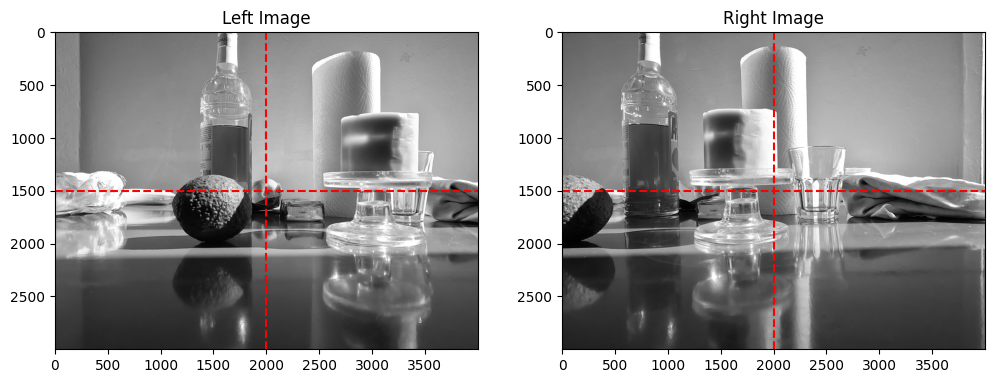

In [5]:
#cap0 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/vid1_dx.MP4")
#cap1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/vid1_sx.MP4")
cap0 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/Right.mp4")
cap1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/Left.mp4")
img_1 = save_BW_img(cap0)
img_2 = save_BW_img(cap1)
img_a = img_1[0]
img_b = img_2[0]
plotting(img_a, img_b)

4000 3000


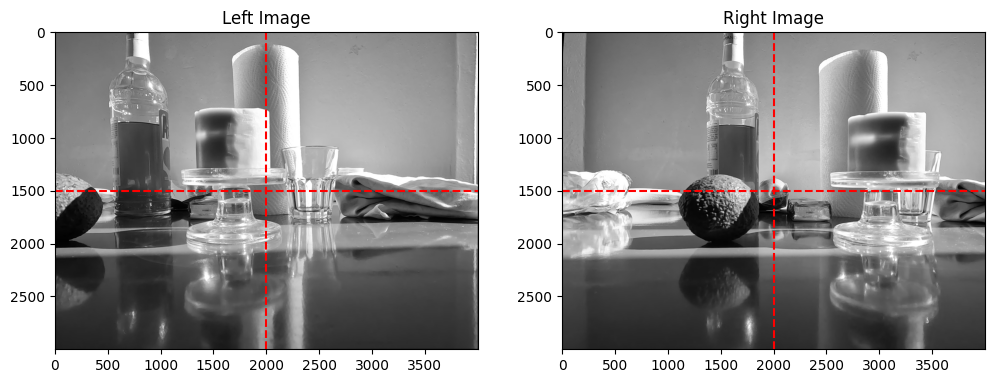

In [6]:
left_image = img_b
right_image = img_a

w=left_image.shape[1]
h = left_image.shape[0]
print(w, h)

# Undistort left and right images
undistorted_left = cv2.undistort(left_image, left_camera_matrix, left_distortion_coeffs)
undistorted_right = cv2.undistort(right_image, right_camera_matrix, right_distortion_coeffs)

plotting(undistorted_left, undistorted_right)

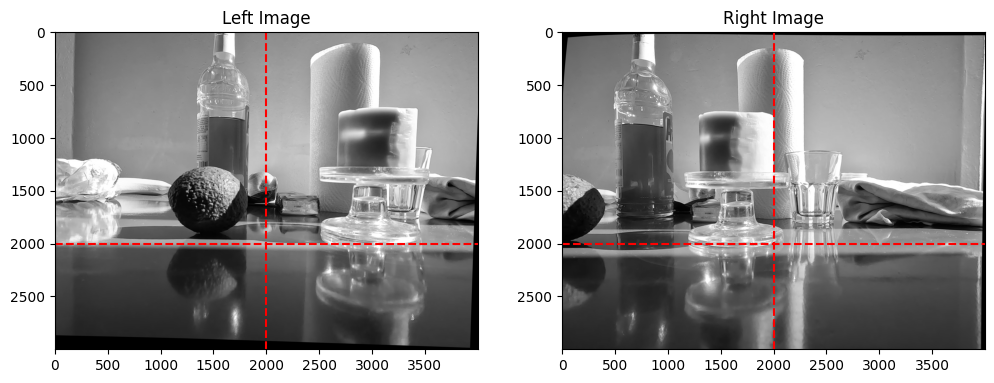

In [7]:
# Rectify left and right images
mapx_left, mapy_left = cv2.initUndistortRectifyMap(left_camera_matrix, left_distortion_coeffs, left_rectification_matrix, left_projection_matrix, (w, h), cv2.CV_32F)
rectified_left = cv2.remap(undistorted_right, mapx_left, mapy_left, cv2.INTER_LINEAR).astype(np.uint8)
mapx_right, mapy_right = cv2.initUndistortRectifyMap(right_camera_matrix, right_distortion_coeffs, right_rectification_matrix, right_projection_matrix, (w, h), cv2.CV_32F)
rectified_right = cv2.remap(undistorted_left, mapx_right, mapy_right, cv2.INTER_LINEAR).astype(np.uint8)

plotting(rectified_left, rectified_right, h_value=2000)

In [8]:
#cam1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/vid1_dx.MP4")
#ret, img_1 = cam1.read()
#img_a= cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
#ret, img_2 = cam2.read()
#cam2= cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/vid1_sx.MP4")
#img_b= cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [9]:
# Show two synchronized images
from PIL import Image
import matplotlib.pyplot as plt

#image1 = img_a

#plt.imshow(image1, cmap='gray')

In [10]:
img_a=rectified_right
img_b=rectified_left

In [5]:
cap0 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/Right.mp4")
cap1 = cv2.VideoCapture("/Users/nilsmanni/Desktop/MA2/design_project/Design-Project/Left.mp4")
img_1 = save_BW_img(cap0)
img_2 = save_BW_img(cap1)
img_a = img_1[0]
img_b = img_2[0]

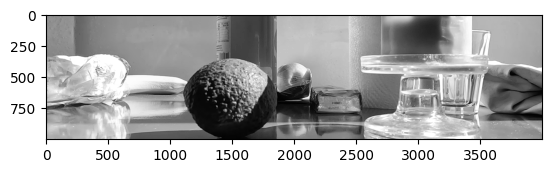

In [6]:
# Define the y-axis range
start_y = 1000
end_y = 2000

# define the x-axis range
start_x = 0
end_x = img_a.shape[1]
# Define the size of the stripe
stripe_height = end_y - start_y
stripe_width = end_x - start_x

img_array = np.array(img_a)
# Select the stripe using array slicing
img_1= img_array[start_y:end_y, start_x:end_x]

img_array = np.array(img_b)
# Select the stripe using array slicing
img_2= img_array[start_y:end_y, start_x:end_x]
# Now, 'stripes' is a list containing the selected stripes from each image
plt.imshow(img_1, cmap='gray')

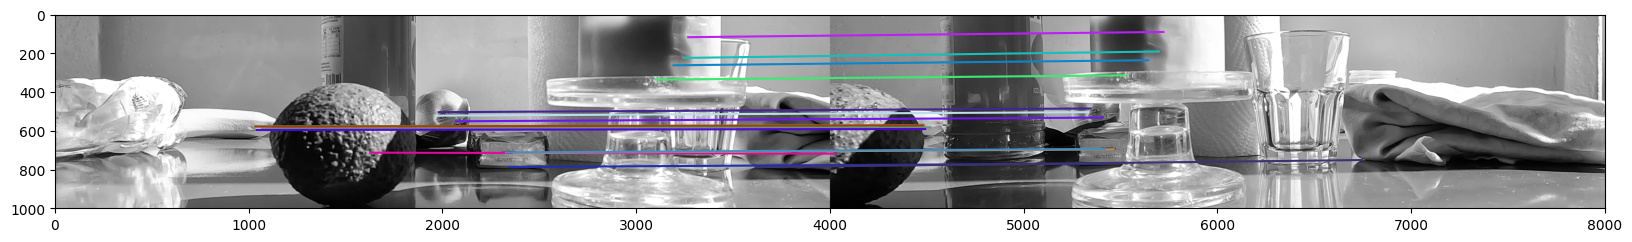

In [7]:
from skimage.feature import match_descriptors, plot_matches, SIFT
descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(img_1)
keypoints_a = descriptor_extractor.keypoints
descriptors_a = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img_2)
keypoints_b = descriptor_extractor.keypoints
descriptors_b = descriptor_extractor.descriptors

matches = match_descriptors(descriptors_a, descriptors_b, max_ratio=0.55,
                              cross_check=True)

fig, ax = plt.subplots(figsize=(20,20))
plot_matches(ax, img_1, img_2, keypoints_a, keypoints_b, matches[:50], only_matches=True)

In [8]:
# Extract matched keypoints
matched_keypoints_a = keypoints_a[matches[:, 0]]
matched_keypoints_b = keypoints_b[matches[:, 1]]

# Print coordinates of matched keypoints
#print("Matched Keypoints in Image A:")
#print(matched_keypoints_a[:, ::-1])  # Swap x, y to row, column
#print("\nMatched Keypoints in Image B:")
#print(matched_keypoints_b[:, ::-1])  # Swap x, y to row, column

key_a=matched_keypoints_a[:, ::-1]
key_b=matched_keypoints_b[:, ::-1]

key_a[:, 1] += 1000  # Accessing y-coordinates of key_a
key_b[:, 1] += 1000  # Accessing y-coordinates of key_b

# Print coordinates of matched keypoints
print("Matched Keypoints in Image A:")
print(key_a)  # Swap x, y to row, column
print("\nMatched Keypoints in Image B:")
print(key_b)  # Swap x, y to row, column

Matched Keypoints in Image A:
[[1035 1578]
 [2340 1787]
 [1981 1504]
 [1971 1522]
 [2073 1551]
 [1069 1588]
 [1042 1596]
 [1629 1713]
 [2369 1715]
 [3616 1788]
 [3101 1336]
 [3269 1117]
 [3247 1224]
 [3193 1262]
 [1035 1578]
 [2328 1712]]

Matched Keypoints in Image B:
[[ 483 1572]
 [1427 1769]
 [1346 1485]
 [1335 1504]
 [1407 1532]
 [ 519 1582]
 [ 492 1591]
 [  27 1718]
 [1461 1696]
 [2747 1751]
 [1527 1314]
 [1721 1090]
 [1699 1191]
 [1642 1236]
 [ 483 1572]
 [1419 1694]]


In [9]:
print(img_a.shape[0])

3000


In [10]:
def normalize_coordinates(x, y, width, height):
    center_x = width / 2
    center_y = height / 2

    normalized_x = (x - center_x) / (width / 2)
    normalized_y = (y - center_y) / (height / 2)

    return normalized_x, normalized_y

# Example function to transform matched keypoints
def transform_matched_keypoints(matched_keypoints, width, height):
    transformed_keypoints = []
    for keypoint in matched_keypoints:
        x, y = keypoint
        normalized_x, normalized_y = normalize_coordinates(x, y, width, height)
        transformed_keypoints.append((normalized_x, normalized_y))
    return np.array(transformed_keypoints)

# Example usage
matched_keypoints_a_centered = transform_matched_keypoints(key_a,img_a.shape[1], img_a.shape[0])
matched_keypoints_b_centered = transform_matched_keypoints(key_b,img_a.shape[1], img_a.shape[0])

print("Matched Keypoints in Image A (Centered Perspective):")
print(matched_keypoints_a_centered)
print("\nMatched Keypoints in Image B (Centered Perspective):")
print(matched_keypoints_b_centered)

Matched Keypoints in Image A (Centered Perspective):
[[-0.4825      0.052     ]
 [ 0.17        0.19133333]
 [-0.0095      0.00266667]
 [-0.0145      0.01466667]
 [ 0.0365      0.034     ]
 [-0.4655      0.05866667]
 [-0.479       0.064     ]
 [-0.1855      0.142     ]
 [ 0.1845      0.14333333]
 [ 0.808       0.192     ]
 [ 0.5505     -0.10933333]
 [ 0.6345     -0.25533333]
 [ 0.6235     -0.184     ]
 [ 0.5965     -0.15866667]
 [-0.4825      0.052     ]
 [ 0.164       0.14133333]]

Matched Keypoints in Image B (Centered Perspective):
[[-0.7585      0.048     ]
 [-0.2865      0.17933333]
 [-0.327      -0.01      ]
 [-0.3325      0.00266667]
 [-0.2965      0.02133333]
 [-0.7405      0.05466667]
 [-0.754       0.06066667]
 [-0.9865      0.14533333]
 [-0.2695      0.13066667]
 [ 0.3735      0.16733333]
 [-0.2365     -0.124     ]
 [-0.1395     -0.27333333]
 [-0.1505     -0.206     ]
 [-0.179      -0.176     ]
 [-0.7585      0.048     ]
 [-0.2905      0.12933333]]


In [11]:
p1= matched_keypoints_b_centered
p2= matched_keypoints_a_centered
# Express in homogenous coordinates
p1 = np.hstack((p1, np.ones((p1.shape[0], 1)))).T
p2 = np.hstack((p2, np.ones((p2.shape[0], 1)))).T

In [15]:
def skewMatrix(x):
    """ Retun the skew matrix M corresponding to a 3 by 1 vector x such that M*y = cross(x,y))

    Parameters
    ----------
       - x np.ndarray(3,1) : vector

    Return
    ------
       - M np.ndarray(3,3) : skew matrix matrix
    """
    return np.array([[    0, -x[2],   x[1]], 
                     [ x[2],     0,  -x[0]],
                     [-x[1],  x[0],      0]])

In [13]:
def triangulation(p1, p2, Rt_1, Rt_2):
    """ Linear Triangulation, see lecture 06 for reminder
     Input:
      - p1, p2 np.ndarray(3, N): homogeneous coordinates in image 1 and 2
      - Rt_1. Rt_2 np.ndarray(3, 4): projection matrix corresponding to camera 1 and 2

     Returns:
      - P np.ndarray(4, N): homogeneous coordinates of 3-D points
    """
    P = np.empty((4, p1.shape[1]))
    # Build matrix of linear homogeneous equations per point

    for i in range(p1.shape[1]):
        A1 = skewMatrix(p1[:, i]) @ Rt_1
        A2 = skewMatrix(p2[:, i]) @ Rt_2
        A = np.r_[A1, A2]

        # Solve the system, see lecture 06 for reminder
        # _, _, VT 
        U ,S, VT = np.linalg.svd(A, full_matrices = False)
        P[:, i] = VT.T[:,-1]
    
    P /= P[3,:]
    # Scale back to homogeneous coordinates (divide by last coordinates) and return
    return P

In [23]:
P_test = np.random.rand(4,10)
P_test[3, :] = 1

Rt_1_test = np.array([[1, 0, 0,0],
                      [0, 1, 0,0],
                      [0, 0, 1,0]])
Rt_2_test = np.array([[-1, 0, 0,-1],
                      [ 0,-1, 0, 0],
                      [ 0, 0, 1, 0]])

p1_test = Rt_1_test @ P_test
p2_test = Rt_2_test @ P_test

P_est = triangulation(p1_test, p2_test, Rt_1_test, Rt_2_test)
np.testing.assert_allclose(P_est, P_test,
                            atol=1e-9,
                            err_msg="Test 1 : Triangulation -> FAILED")
print("Test 1 : Triangulation -> PASSED")
print(f"Mean triangulation error : {np.mean(np.abs(P_est - P_test))} below threshold (1e-9)")

Test 1 : Triangulation -> PASSED
Mean triangulation error : 9.610368056911511e-17 below threshold (1e-9)


In [24]:
def eightpoints(p1, p2):
    """
    Estimate the essential matrix E from corresponding points using the 8-point algorithm.

    Parameters
    ----------
    p1,p2 : np.array(3xN), points in image 1, image 2

    Returns
    -------
    E : np.array(3x3), essential matrix
    """
    Q = np.zeros((p1.shape[1],9))
    # TODO : Compute the matrix Q using kronecker products
    for i in range(p1.shape[1]):
        Q[i,:] = np.kron(p2[:,i],p1[:,i]).T

    # TODO : Perform SVD(Q) & extract E from V last column
    _, _, VT_Q = np.linalg.svd(Q)
    Es = VT_Q.T[:,-1]        # np.linalg.svd outputs V.H ~ V.T, not V 
    E = Es.reshape(3,3)

    # TODO : Enforce the rank 2 constraint on E: average lambda 1 and 2 and set lambda 3=0
    U, s, VT =  np.linalg.svd(E)
    s[0] = s [1] = 0.5 * (s[1] + s[0])
    s[2] = 0
    sigma = np.diag(s)

    E = U @ sigma @ VT

    return E

In [25]:
E = eightpoints(p1, p2)

In [26]:
def epip2err(E, p1, p2):
    """
    Compute the reprojection error for a given essential matrix E and set of tie points.

    Parameters
    ----------
    E : np.array(3x3), essential matrix
    p1, p2 : np.array(3xN), points in image 1, 2

    Returns
    -------
    err : np.array(N), reprojection error
    """
    return np.sqrt(np.sum((np.sum(p2*(E@p1),axis=0))**2)/p1.shape[1])

In [27]:
np.testing.assert_allclose(epip2err(E, p1, p2),0,
                            atol=20e-2,
                            err_msg="Test 2: Essential Martix Estimation -> FAILED")
print("Test 2: Essential Martix Estimation -> PASSED")
print(f"Reprojection error : {epip2err(E, p1, p2)} below threshold (3e-2)")

Test 2: Essential Martix Estimation -> PASSED
Reprojection error : 0.054090617275458046 below threshold (3e-2)


In [28]:
def decomposeEssential(E):
    """ 
    Decompose essential matrix into R1, R2, t1, t2

    Parameters
    ----------
    E : np.array(3x3), essential matrix

    Returns
    -------
    R1, R2 : np.array(3x3), rotation matrix 1 and 2
    t1, t2 : np.array(3x1), translation vector 1 and 2

    """
    # TODO : Perform SVD(E), extract t vectors from last column of U and build rotation matrices
    U, _, VT = np.linalg.svd(E)
    t = U[:,2]/np.linalg.norm(U[:,2])


    # Estimate rotations
    W = np.array([ [0, -1,  0],
                    [1,  0,  0],
                    [0,  0,  1]])
    # TODO : Build rotation matrices R1 and R2 and check the determinant
    R1 = U @ W @ VT
    R2 =U @ W.T @ VT

    # TODO : if ||t|| != 1, normalize t to unit norm
    if np.linalg.det(R1) < 0: 
        R1 *= -1
    if np.linalg.det(R2) < 0: 
        R2 *= -1
    return R1, R2, t, -t

In [29]:
def checkRelativePose(Rs, ts,p1,p2):
    """ 
    Find correct pose (R,t) with the most points in front of both cameras.

    Parameters
    ----------
    Rt : [np.array(3x3), np.array(3x3)], list of rotation matrices in list
    ts : [np.array(3xN), np.array(3xN)], list of translation vectors

    Returns
    -------
    R_out, t_out : np.array(3x3) and np.array(3x1), valid rotation matrix and translation vector
    """
   
    Rt_1 = np.eye(3,4)  # Projection matrix of camera 1

    front_best = 0
    # TODO : Loop over all possible combinations of R and t to estimate Rt_2 and triangulate points

    for R in Rs:  
        for t in ts:
            #estimate transformation from camera 1 to camera 2
            Rt_2 =  np.c_[R,t]

            #triangulate in camera 1 coordinate system
            P1 = triangulation(p1,p2,Rt_1, Rt_2)

            #reproject in camera 2 coordinates system
            P2 =Rt_2 @ P1
            
            #Estimate nb points in front of cameras
            front = np.sum(P1[2,:]>0) + np.sum(P2[2,:]>0)
                              
            if (front > front_best):
                R_out = R
                t_out = t
                front_best = front
                
    return R_out, t_out

In [30]:
R1, R2, t1, t2 = decomposeEssential(E)

R, t = checkRelativePose([R1,R2], [t1, t2], p1, p2)

Rt1 = np.c_[np.eye(3), np.zeros((3, 1))]
Rt2 = np.c_[R, t]

# Triangulate your points using the chosen R|t matrices and plot the 3D scene
P = triangulation(p1, p2,left_projection_matrix , right_projection_matrix)

In [31]:
print(right_projection_matrix)

[[ 3.60512862e+03  0.00000000e+00  2.64745764e+03 -1.34568673e+03]
 [ 0.00000000e+00  3.60512862e+03  2.09630426e+03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]]


In [33]:
print(left_projection_matrix)

[[3.60512862e+03 0.00000000e+00 2.64745764e+03 0.00000000e+00]
 [0.00000000e+00 3.60512862e+03 2.09630426e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]]


In [34]:
print(Rt2)

[[ 0.98842421 -0.04500633 -0.1448862   0.99598161]
 [ 0.03739695  0.99779553 -0.05482279  0.00219519]
 [ 0.14703417  0.04876988  0.98792836  0.08953106]]


In [16]:
P = triangulation(p1, p2,left_projection_matrix , right_projection_matrix)

In [18]:
cam__dist = 0.14 # Metric distance between the two cameras to scale the plot
P_metric = cam__dist * P[:3,:]
#t_metric = cam__dist * t

In [19]:
print(P_metric[1,1])

239.9013740990932


In [20]:
print(P_metric)

[[ 501.19520738  303.03504015  435.82969326  435.10988931  415.47535243
   502.99146692  503.00900862  172.83347932  304.73511646  320.13562001
   175.77519504  178.57296357  178.60394902  178.32297357  501.19520738
   304.38389587]
 [ 396.73222626  239.9013741   345.05577725  344.48314619  328.93966219
   398.15553365  398.16630654  136.79226093  241.25437515  253.50295996
   139.17721472  141.40756982  141.42682368  141.20097891  396.73222626
   240.97460456]
 [-682.29821412 -412.60791005 -593.41008655 -592.42879118 -565.70284972
  -684.74819051 -684.76858123 -235.26528331 -414.92538411 -436.00067483
  -239.3374041  -243.15579637 -243.19697839 -242.81176609 -682.29821412
  -414.44387725]]


In [21]:
print(P_metric.shape[1])

16


In [22]:
point_norme= []
for i in range(P_metric.shape[1]):
    norme = np.sqrt(P_metric[0,i]**2 + P_metric[1,1]**2 + P_metric[2,1]**2)
    point_norme.append(norme)

print(point_norme)

[692.0943524061289, 565.3566947424149, 646.3323280302601, 645.8471742698845, 632.7856866366543, 693.3962593819613, 693.4089842880651, 507.61143437275643, 566.2697660435388, 574.704073359002, 508.6205618389306, 509.5942111622015, 509.60506997010583, 509.50666299474153, 692.0943524061289, 566.0808359199395]
